In [ ]:
'''
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

'''

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [24]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Forest Fire Dataset/Training", target_size = (150,150),batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("Forest Fire Dataset/Training", target_size = (150,150),batch_size = 32, class_mode = 'binary')

Found 1520 images belonging to 2 classes.


Found 1520 images belonging to 2 classes.


In [25]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [26]:
#creating the CNN model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [27]:
#compile

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
#model fit

r = model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
48/48 [==============================] - 31s 617ms/step - loss: 0.3678 - accuracy: 0.8507 - val_loss: 0.1560 - val_accuracy: 0.9546
Epoch 2/5
48/48 [==============================] - 32s 660ms/step - loss: 0.1495 - accuracy: 0.9513 - val_loss: 0.1248 - val_accuracy: 0.9651
Epoch 3/5
48/48 [==============================] - 29s 602ms/step - loss: 0.1326 - accuracy: 0.9559 - val_loss: 0.0851 - val_accuracy: 0.9684
Epoch 4/5
48/48 [==============================] - 26s 533ms/step - loss: 0.1191 - accuracy: 0.9625 - val_loss: 0.1528 - val_accuracy: 0.9382
Epoch 5/5
48/48 [==============================] - 26s 549ms/step - loss: 0.1007 - accuracy: 0.9632 - val_loss: 0.0708 - val_accuracy: 0.9763


In [29]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

48/48 [==============================] - 6s 121ms/step


In [30]:
predictions

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [31]:
print(len(predictions))

1520


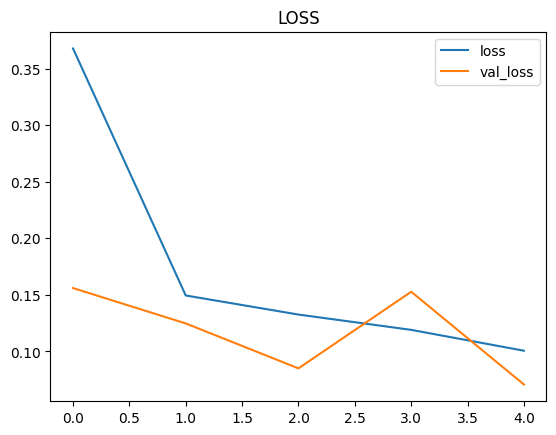

In [32]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("LOSS")
plt.legend()

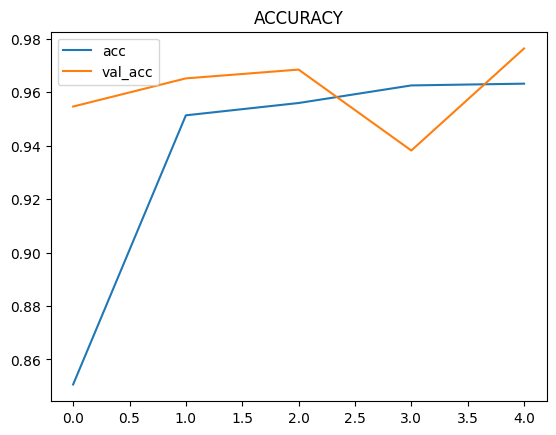

In [33]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.title("ACCURACY")
plt.legend()

In [34]:
#Take images from DB and check results on it.

def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if(val == 1):
        plt.xlabel("No Fire",fontsize=30)
    elif(val==0):
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 86ms/step
[[0.]]


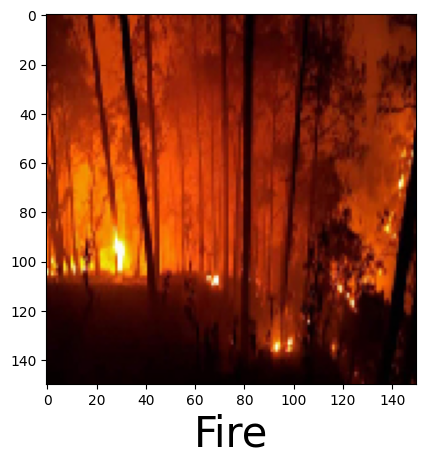

In [35]:
predictImage("Forest Fire Dataset/Testing/fire_0139.jpg")

1/1 [==============================] - 0s 40ms/step
[[1.]]


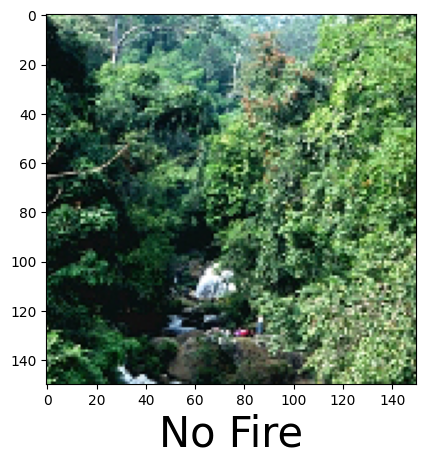

In [36]:
predictImage("Forest Fire Dataset/Testing/nofire_0267.jpg")